# GDAL Tutorial

This notebook contains the first few cells from a tutorial at https://opensourceoptions.com/blog/gdal-python-tutorial-reading-and-writing-raster-datasets/

I used this notebook to test my installation of GDAL on my Ubuntu 20.04 machine following directions provided in https://stackoverflow.com/questions/72887400/install-gdal-on-linux-ubuntu-20-04-4lts-for-python

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

## Open a Raster

In [2]:
fn = 'yona.tif'
ds = gdal.Open(fn)
type(ds)

osgeo.gdal.Dataset

## Raster Dataset Information and Properties

In [3]:
print("Projection: ", ds.GetProjection())  # get projection
print("Columns:", ds.RasterXSize)  # number of columns
print("Rows:", ds.RasterYSize)  # number of rows
print("Band count:", ds.RasterCount)  # number of bands

Projection:  PROJCS["WGS 84 / UTM zone 55N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",147],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32655"]]
Columns: 32731
Rows: 23585
Band count: 4


In [4]:
print("GeoTransform", ds.GetGeoTransform())

GeoTransform (259821.30138992154, 0.014080873475957724, 0.0, 1484150.4414387643, 0.0, -0.014080873475957724)


In [5]:
data_array = ds.GetRasterBand(1).ReadAsArray()
data_array.shape

(23585, 32731)

## Display a Raster Band

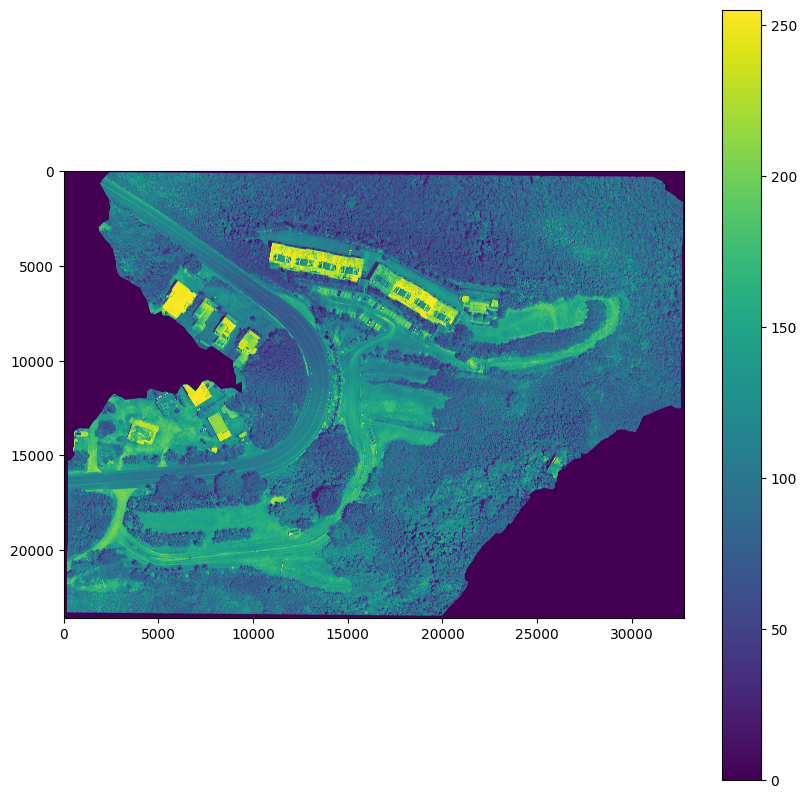

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(data_array)
plt.colorbar()

## Getting No Data Values
It is common for a raster band to have a designated value that represents a pixel with no data. Obtaining the no data 
value is important so that you can exclude those values from calculations you may perform on the data. Let’s retreive 
and print the no data value for the elevation raster band.

In [7]:
ndv = data_array = ds.GetRasterBand(1).GetNoDataValue()
print('No data value:', ndv)

No data value: None


In [46]:
gdal.UseExceptions()

# # commandline = 'gdal_translate -srcwin 15865 11292 1000 1000 yona.tif center.tif'
# translateOptionText = '-srcwin 15865 11292 1000 1000'
# print(translateOptionText)
# translateoptions = gdal.TranslateOptions(translateOptionText)

# # translateoptions = gdal.TranslateOptions(gdal.ParseCommandLine("-of Gtiff -co COMPRESS=LZW"))
# #translateoptions = gdal.TranslateOptions(gdal.ParseCommandLine("-srcwin 15865 11292 1000 1000"))
# translateoptions = gdal.TranslateOptions("-srcwin 15865 11292 1000 1000")

# result = gdal.Translate(destName='center.tif', srcDS=ds, options=translateoptions)

# result = gdal.Translate('center.tif', ds, options=gdal.TranslateOptions('-srcwin 15865 11292 1000 1000'))

# gdal.Translate('center.tif', ds, options=gdal.TranslateOptions('-srcwin 15865 11292 1000 1000'))
gdal.Translate("center.tif", ds, srcWin = (10000 10000, 1000, 1000))


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (4070326723.py, line 17)

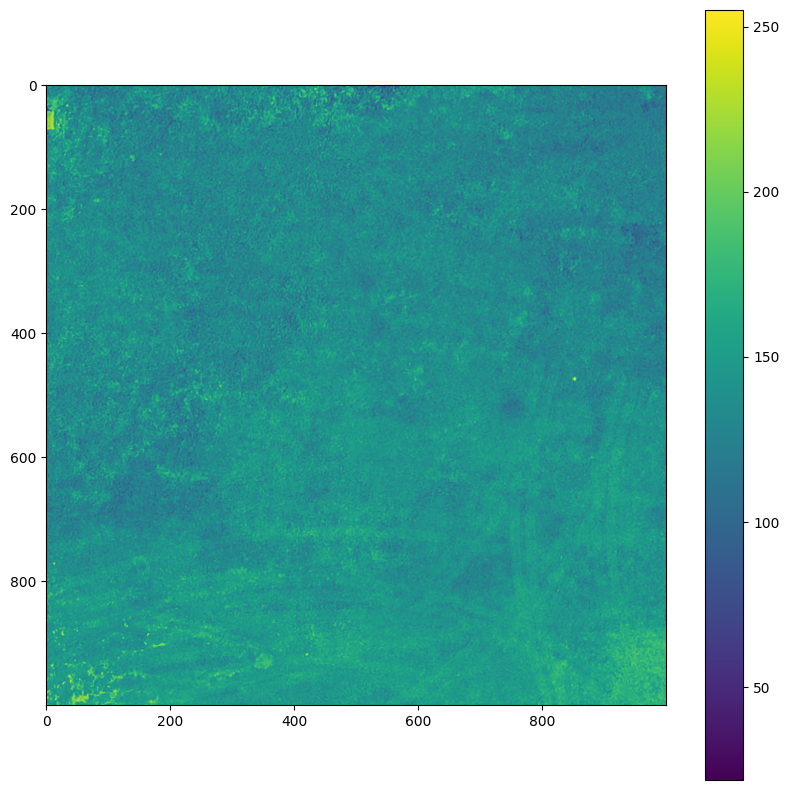

In [45]:
data_array = result.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(10, 10))
plt.imshow(data_array)
plt.colorbar()

In [20]:
print(translateoptions)

(<osgeo.gdal.GDALTranslateOptions; proxy of <Swig Object of type 'GDALTranslateOptions *' at 0x7fa89446c930> >, None, None)
